In [1]:
from plxscripting.easy import *

In [2]:
password = "nicFgr^TtsFm~h~M"
localhostport_input = 10000 
localhostport_output = 10001
s_i, g_i = new_server('localhost', localhostport_input, password=password) 
s_o, g_o = new_server('localhost', localhostport_output, password=password)

In [3]:
from ltest.geometry import Geometry

In [4]:
geo = Geometry(g_i, 3, 2)

In [5]:
geo

buried plate foundation with no fill or underfill:

  -d = 2.00                        foundation depth [m]
  -b = 3.00                        foundation width [m]
  -bfill = 0.00                    distance between foundation edge and the start of the
                                   fill slope [m]

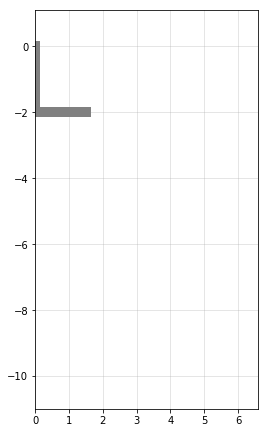

In [6]:
geo.plot()

In [10]:
geo._phase_polygons[0]

<CutObject {F52A6907-C9F5-4B83-BB5C-E0AD81D2446D}>

In [13]:
g_i.gotostructures()
out = g_i.polygon([1,1], [2, 3], [-1, 3])

In [14]:
g_i.polygons[0]

<Polygon {809E5594-4057-41D4-BF91-4D8E65D3C6C5}>

In [15]:
out

[<Polygon {809E5594-4057-41D4-BF91-4D8E65D3C6C5}>,
 <Soil {21727A35-A2A2-4FD2-BAF6-B2A346902611}>]

In [34]:
g_i.gotostages()
g_i.polygons[0]

<CutObject {BFD2BDDB-C421-4CD1-8C5C-526BB9D6F22F}>

In [38]:
print(g_i.commands())

echo
  <no parameters>
  Material' PlxBasePhase'
  <{1,...}: ObjectWithFeedback>'
  Listable'
commands (cms)
  <no parameters>
  Text'
  Listable'
  Listable' Text'
multiply (mul)
  Number
  <{1,...}: Text'>' Number
  <{1,...}: PlxObject'>' <Everything>'
  Listable' Number
  Listable' <{1,...}: Text'>' Number
info
  <no parameters>
  <{1,...}: ObjectWithFeedback>'
  Listable'
setproperties (sps)
  <PropValue{1,...}: <PropValue: Text' Any>'>
getmetadata (gmd)
  Text'
setmetadata (smd)
  Text' Text'
  Text' <ObjectValue{1,...}: <ObjectValue: PlxObject' Text'>'>
save (sv)
  <no parameters>
  Text'
help
  <no parameters>
gotosoil (gto)
  <no parameters>
gotostructures (gtt)
  <no parameters>
gotomesh (gtm)
  <no parameters>
  Boolean'
gotowater (gtw)
  <no parameters>
  Boolean'
gotoflow (gtf)
  <no parameters>
  Boolean'
gotostages (gts)
  <no parameters>
  Boolean'
undo (u)
  <no parameters>
  Integer'
redo (r)
  <no parameters>
  Integer'
retrievesuggestedparameters (rsp)
  PlxBasePhase

In [49]:
g_i.findstagedfeature(g_i.Soil_1_1)

<SourceFeature {2C089493-A394-4242-8B6E-5C9D6765855B}>

In [50]:
g_i.setmaterial(g_i.Soil_1, g_i.InitialPhase, g_i.x)

'OK'

In [43]:
g_i.Soil_1_1

<staged.Soil {E6915BF3-64EB-42ED-B613-548B747F786E}>

In [ ]:
g_i.set(g_i.Soil_3_1.Material, g_i.Model.CurrentPhase, self['soil material']['strata_1'])

In [26]:
g_i.Soil_1_1

<staged.Soil {E6915BF3-64EB-42ED-B613-548B747F786E}>

In [31]:
g_i.x

<SoilMat {4D6D7287-9360-4E0E-9736-22BC4FB73953}>

In [32]:
g_i.Soil_1.setmaterial(g_i.x)

PlxScriptingError: Unsuccessful command:
Tried executing, but failed

In [33]:
g_i.polygons[0].UserFeatures.Material

<Staged Property list>

In [24]:
g_i.polygons[0]

<CutObject {BFD2BDDB-C421-4CD1-8C5C-526BB9D6F22F}>

In [19]:
g_i.set(g_i.polygons[0].UserFeatures.Material, g_i.Model.CurrentPhase, g_i.x)

PlxScriptingError: Unsuccessful command:
Unrecognized token

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
from ltest.geometry import Geometry
from ltest.model import Model

In [5]:
def set_concrete_plate(fc, gamma, d, young_modulus=None, poisson=0.4):
    concrete = {}
    concrete['fc'] = fc * 1000 # kPa
    if young_modulus is None:
        concrete['E'] = 4700 *  np.sqrt(concrete['fc']) # kPa
    else:
        concrete['E'] = young_modulus
    concrete['nu'] = poisson 
    concrete['EA'] = concrete['E'] * d
    concrete['EI'] = concrete['E'] * d**3/12
    concrete['d'] = np.sqrt(12 * concrete['EI'] / concrete['EA'])
    concrete['Gref'] = concrete['EA'] / concrete['d']  / (2 * (1 + concrete['nu'])) # KPa
    return concrete

In [6]:
geo = Geometry(2, 3, b1=0.3, d1=0.5, dunder=0.5, foundation_type='solid', fill_angle=30, dfill=[0.5, 1],
               dstrata=[1.5,1.7,1], wt=2)
geo

buried solid foundation with fill and underfill:

  -d = 3.00                        foundation depth [m]
  -b = 2.00                        foundation width [m]
  -b1 = 0.30                       column width [m]
  -d1 = 0.50                       foundation thickness [m]
  -dunder = 0.50                   foundation underbase thickness [m]
  -fill_angle = 30.00              fill angle [deg]
  -bfill = 0.50                    distance between foundation edge and the start of the
                                   fill slope [m]
  -wt = 2.00                       water table depth [m]

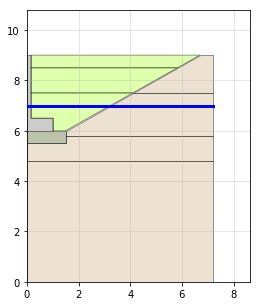

In [7]:
geo.plot()#fill=False, foundation=False)

In [8]:
# example of hs material
sand = {}
sand['SoilModel'] = 'hardening soil'
sand["DrainageType"] = 0
sand['gammaSat'] = 17
sand['gammaUnsat'] = 20
sand['e0'] = 0.2
sand['E50ref'] = 4e4
sand['Eoedref'] = 4e4
sand['Euref'] = 1.2e5
sand['powerm'] = 0.5
sand['c'] = 0
sand['phi'] = 32
sand['psi'] = 2
sand['nu'] = 0.2

# example of elastic material
concrete = {}
concrete['SoilModel'] = 'elastic'
concrete["DrainageType"] = 0
concrete['Eref'] = 4700 *  np.sqrt(24000) # kPa
concrete['nu'] = 0.4 #
concrete['gammaSat'] = 17
concrete['gammaUnsat'] = 20

# Create H30 concrete slab with a 40cm thickness and 24kN/m3 unit weight
column = set_concrete_plate(30, 24, 0.4)
# Create H30 concrete slab with a 60cm thickness and 24kN/m3 unit weight
footing = set_concrete_plate(30, 24, 0.6)

In [197]:
#mdl = Model(s_i, g_i, 2, 3, sand, column=column, footing=footing)
#mdl = Model(s_i, g_i, 2, 3, sand, b1=0.3, d1=0.5, foundation_type='solid', concrete=concrete)
mdl = Model(s_i, g_i, 2, 3, sand, b1=0.3, d1=0.5, foundation_type='solid', concrete=concrete, fill_angle=30, fill=sand, wt=2)

In [ ]:
mdl.

In [50]:
self = mdl
g_i.gotostages()
self['iphases'] = {}
self['start phase'] = 'construction'
# Initial phase
self['iphases']['Initial phase'] = g_i.InitialPhase
g_i.Model.CurrentPhase = g_i.InitialPhase

In [51]:
g_i.gotostages()
self['start phase'] = 'construction'
# Initial phase
self['iphases']['Initial phase'] = g_i.InitialPhase
g_i.Model.CurrentPhase = g_i.InitialPhase

for idx in self['structures']['polygon']:
    g_i.deactivate(self['structures']['polygon'][idx], g_i.Model.CurrentPhase)
for idx in self['structures']['plate']:
    g_i.deactivate(self['structures']['polygon'][idx], g_i.Model.CurrentPhase)

for idx in range(self['geo']._nstrata):
    lbl = 'strata_{:.0f}'.format(idx+1)
    g_i.activate(self['structures']['polygon'][lbl] , g_i.Model.CurrentPhase)

for idx in range(self['geo']._nexcavated):
    lbl = 'excavated_{:.0f}'.format(idx+1)
    g_i.activate(self['structures']['polygon'][lbl] , g_i.Model.CurrentPhase)

if self['geo']._under is not None:
    g_i.activate(self['structures']['polygon']['under'], g_i.Model.CurrentPhase)

<SoilMat {6CF29AB3-491C-42C8-ADE0-F71E15261B36}>

In [76]:
g_i.Soil_3_1.Material[g_i.Phase_1] = self['soil material']['strata_1']

In [126]:
self['structures']['polygon']['strata_1']

<Polygon {49708DEC-8DB7-40D8-BD62-9394BE11B133}>

In [124]:
self['structures']['polygon']['strata_1'].Soil.Material[g_i.Model.CurrentPhase]

TypeError: '<class 'plxscripting.plxproxyfactory.PlxProxyFactory.mix_in.<locals>.CombinedClass'>' object is not subscriptable

In [150]:
#g_i.gotostages()
g_i.gotostructures()
#g_i.polygons[2].Soil.Material[g_i.Model.CurrentPhase]

'OK'

In [200]:
g_i.gotostructures()
g_i.polygons

<ModelGroup {A7D424CC-3CAF-482E-BF07-AB43B2348C9F}>

In [201]:
g_i.gotostages()
g_i.polygons

<CutModelGroup {BE1607C6-2A69-4DE6-AFDA-5A6936949618}>

In [198]:
g_i.gotostructures()
for poly in g_i.polygons:
    print(poly.Name.value)

Polygon_1
Polygon_2
Polygon_3
Polygon_4


In [199]:
g_i.gotostages()
g_i.Model.CurrentPhase = g_i.InitialPhase
len(g_i.polygons)
for poly in g_i.polygons:
    print(poly.Name.value)

Polygon_1_Polygon_2_1
Polygon_2_Polygon_4_1
Polygon_3_1


In [166]:
g_i.polygons[0].Name.value

'Polygon_1_Polygon_2_1'

In [111]:
g_i.Soil_1.Material

<Staged Property list>

In [102]:
g_i.Soil_1

<SourceFeature {C0EE187F-D7CD-41DE-9318-30081402E23A}>

In [117]:
g_i.Soil_3_1

<staged.Soil {A0BBA7FD-4576-46B7-A332-F7E411F702F3}>

In [ ]:
g_i.Soil_3_1

In [120]:
g_i.Soil_3_1.Material

<staged.Material {4CE7A26C-4C5B-43A9-A8D8-4882E56C4C53}>

In [119]:
g_i.set(g_i.Soil_3_1.Material, g_i.Model.CurrentPhase, self['soil material']['strata_1'])

'OK'

In [81]:
dir(self['structures']['soil']['strata_1'])

['ApplyStrengthReduction',
 'Comments',
 'Deconfinement',
 'Material',
 'Metadata',
 'Name',
 'Parent',
 'TypeName',
 'UserFeatures',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__get__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__self__',
 '__self_class__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__thisclass__',
 'clearmaterial',
 'commands',
 'dump',
 'echo',
 'getmetadata',
 'info',
 'multiply',
 'observers',
 'rename',
 'set',
 'setmaterial',
 'setmetadata',
 'setproperties']

In [71]:
g_i.gotostages()
self['structures']['soil']['strata_1'].set(self['soil material']['strata_1'])

PlxScriptingError: Unsuccessful command:
Unknown object. Check the spelling and ensure the object exists before trying to access it.

In [55]:
g_i.gotostructures()
.set(mdl['soil material']['strata_1'])

'OK'

In [196]:
mdl['structures']

{'polygon': {'fill_1': <Polygon {C277F671-0077-4094-9BA9-C306259E33F2}>,
  'excavated_1': <Polygon {35B85B51-124F-4061-9C9E-2593B880BA6F}>,
  'strata_1': <Polygon {AEC49203-7BF4-426E-A1D2-CACE41B7C933}>,
  'foundation': <Polygon {7FF87524-BC88-41FA-9A58-7066F795889B}>},
 'soil': {'fill_1': <Soil {2F50E566-0A22-407F-A0BF-8F345E9BFA51}>,
  'excavated_1': <Soil {941E8DB9-B0B3-4047-86B7-9526F7171F83}>,
  'strata_1': <Soil {FE50D6DD-83C9-4D7D-8FC2-96AC81448C64}>,
  'foundation': <Soil {B6D22006-1AFB-45BB-B1D9-658A52EB71D2}>},
 'line': {'column_int': <Line {CF5D6150-E862-4870-A05E-129BBB3F6DC9}>,
  'footing_pos_int': <Line {49AD73F1-AFF1-4C1F-A79E-E03A1FF06684}>,
  'footing_lat': <Line {D9DBC13F-32AE-4278-A1EE-9586B47F7D0F}>,
  'footing_neg': <Line {A62C2596-2FAA-47CA-8F2B-B0415A557FC7}>,
  'load': <Line {222D87B3-276F-4045-8212-6BE449D4158F}>},
 'plate': {},
 'point': {'column_int_1': <Point {191E1688-0181-47C2-8036-D17F47345E68}>,
  'column_int_2': <Point {AFC75637-BB44-4B07-810E-689183D1D

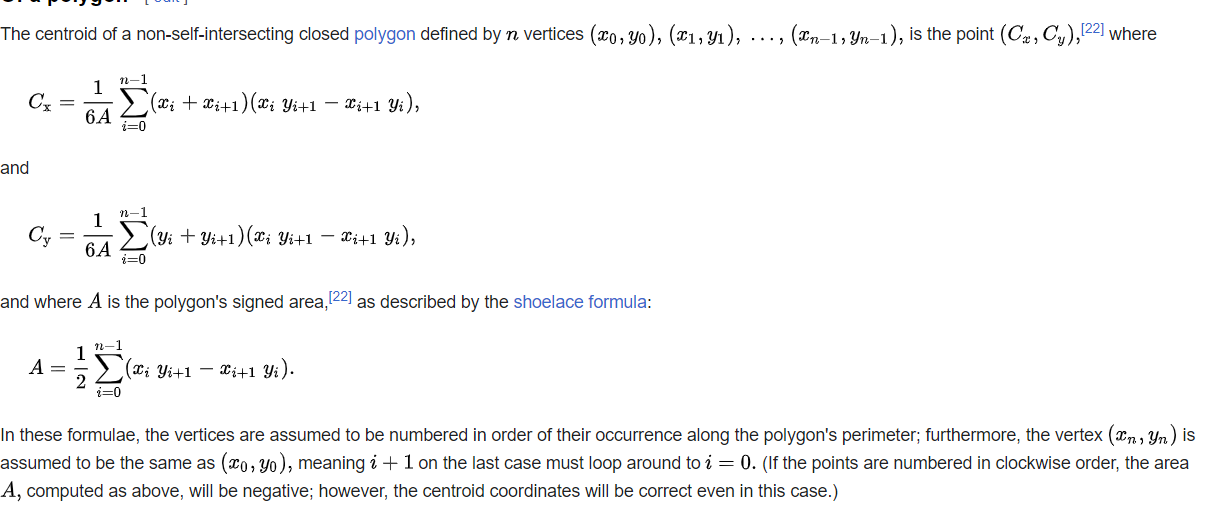

In [211]:
class Polygon():
    
    def __init__(self, vertex):
        vertex = np.array(vertex)
        if np.array_equal(vertex[-1], vertex[0]):
            vertex = vertex[:-1]
        self._vertex = vertex
        self._nvertex = len(self._vertex)
        self._set_area()
        self._set_centroid()
    
    def _closed_vertex(self):
        return np.vstack([self._vertex, self._vertex[0]])
        
    def _set_area(self):
        vertex = self._closed_vertex()
        A = 0
        for idx in range(self._nvertex):
            A += vertex[idx, 0] * vertex[idx + 1, 1] - vertex[idx + 1, 0] * vertex[idx, 1]
        self._area = A/2
    
    def _set_centroid(self):
        vertex = self._closed_vertex()
        Cx = 0
        Cy = 0
        for idx in range(self._nvertex - 1):
            Cx += (vertex[idx, 0] + vertex[idx + 1, 0]) * (vertex[idx, 0] * vertex[idx + 1, 1] - vertex[idx + 1, 0] * vertex[idx, 1])
            Cy += (vertex[idx, 1] + vertex[idx + 1, 1]) * (vertex[idx, 0] * vertex[idx + 1, 1] - vertex[idx + 1, 0] * vertex[idx, 1])
        self._centroid = np.array([Cx, Cy]) / (6 * self._area)

In [212]:
poly = Polygon([[0,0], [0, 2], [2,2], [0, 2]])

C:\ProgramData\Bentley\Geotechnical\PLAXIS Python Distribution V1\python\lib\site-packages\plxscripting\plaxis_jupyter_kernel.py:29: RuntimeWarning: invalid value encountered in true_divide
  ENV_VAR_PLAXIS_SERVER_PASSWORD = 'PLAXIS_SERVER_PASSWORD'


In [206]:
vertex = np.array([[0,0], [0, 2], [2,2], [0, 2]])
vertex

array([[0, 0],
       [0, 2],
       [2, 2],
       [0, 2]])

In [210]:
np.vstack([vertex, vertex[0]])

array([[0, 0],
       [0, 2],
       [2, 2],
       [0, 2],
       [0, 0]])